Attempt at finding clusters in the events of GENIE16_CH datasets

In [1]:
import mhn
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import mhn_tools as mytools
import checkpoints_mbonart as cp
import EventDistanceMeasurer as edm

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(999)
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "G16_CH_MEL_Events.csv", "G16_CH_PRAD_Events.csv"]
file_path=os.path.join( os.getcwd(), '..','data', file_names[2] )
data_input = pd.read_csv(file_path)
data_input.drop(columns=['CH'], inplace =True)
events=list(data_input.columns)[1:]
print(events)


['TP53 (M)', 'MCL1/1q (Amp)', 'TERT/5p (Amp)', 'KRAS (M)', 'CDKN2A/9p (Del)', 'MYC/8q (Amp)', 'EGFR/7p (Amp)', 'EGFR (M)', 'EPHA7/6q (Del)', 'BCL2/18q (Del)', 'RB1/13q (Del)', 'STK11 (M)', 'RBM10 (M)', 'KEAP1 (M)', 'SMARCA4 (M)', 'NF1 (M)', 'ATM (M)', 'PIK3CA (M)', 'BRAF (M)', 'ARID1A (M)', 'FAT1 (M)', 'SETD2 (M)', 'MET (M)', 'RB1 (M)', 'ERBB2 (M)', 'SMAD4 (M)', 'KMT2D (M)', 'ARID2 (M)', 'APC (M)', 'ATRX (M)']


In [3]:
#cp.FORCE_EXECUTE_COMPUTATIONS=True
n_test_events=3
dist_measurer = edm.EventDistanceMeasurerCP(events[0:n_test_events],events[n_test_events:])
dist_measurer.load_data(data_input)
dist_measurer.train_All_MHNs()
dist_measurer.extend_event_domain()
dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_L1_SYM)

0x1.4e601039c01f3p+63
Directory for storage is edm_4e601039c01f3/TP53M_MCL11qAmp_TERT5pAmp
check if mbonart_checkpoints/edm_4e601039c01f3/TP53M_MCL11qAmp_TERT5pAmp   does exist


,KRAS (M),CDKN2A/9p (Del),MYC/8q (Amp),EGFR/7p (Amp),EGFR (M),EPHA7/6q (Del),BCL2/18q (Del),RB1/13q (Del),STK11 (M),RBM10 (M),...,RB1 (M),ERBB2 (M),SMAD4 (M),KMT2D (M),ARID2 (M),APC (M),ATRX (M),TP53 (M),MCL1/1q (Amp),TERT/5p (Amp)
KRAS (M),0.00,9.22,11.83,12.90,11.03,8.83,10.03,10.43,7.38,7.21,...,13.80,9.81,9.65,10.52,10.61,12.06,11.25,12.63,12.63,12.63
CDKN2A/9p (Del),9.22,0.00,3.55,4.50,3.33,1.35,2.49,2.41,4.28,2.35,...,5.88,1.75,1.49,2.76,3.01,3.82,3.01,4.41,4.41,4.41
MYC/8q (Amp),11.83,3.55,0.00,1.45,3.50,3.16,2.74,2.34,5.13,5.04,...,2.35,2.40,2.38,2.79,3.30,1.63,1.58,1.06,1.06,1.06
EGFR/7p (Amp),12.90,4.50,1.45,0.00,3.61,4.37,3.79,2.87,6.58,6.25,...,3.06,3.29,3.45,3.16,3.73,1.92,1.93,1.55,1.55,1.55
EGFR (M),11.03,3.33,3.50,3.61,0.00,4.14,1.50,1.72,7.07,3.94,...,5.33,2.04,2.20,1.71,2.00,2.79,2.42,3.82,3.82,3.82
EPHA7/6q (Del),8.83,1.35,3.16,4.37,4.14,0.00,3.14,2.92,2.93,2.08,...,5.47,2.44,2.18,3.45,3.66,3.61,2.80,4.20,4.20,4.20
BCL2/18q (Del),10.03,2.49,2.74,3.79,1.50,3.14,0.00,1.56,5.89,2.82,...,4.93,1.60,1.10,1.63,1.94,2.85,2.04,3.44,3.44,3.44
RB1/13q (Del),10.43,2.41,2.34,2.87,1.72,2.92,1.56,0.00,5.63,3.56,...,3.69,0.90,0.98,0.53,1.10,1.77,1.00,2.36,2.36,2.36
STK11 (M),7.38,4.28,5.13,6.58,7.07,2.93,5.89,5.63,0.00,3.13,...,7.08,5.03,4.87,6.10,6.45,5.42,5.29,5.75,5.75,5.75
RBM10 (M),7.21,2.35,5.04,6.25,3.94,2.08,2.82,3.56,3.13,0.00,...,7.01,2.96,2.80,3.67,3.74,5.25,4.40,5.78,5.78,5.78


In [4]:
#sns.clustermap(dist_measurer._dist_mat)


Here we use the same algorithm but with 4 test events (the 3 from before and KRAS)

In [5]:
distance_measurer2=edm.getDistMeasurer(data_input, n_test_events=4, extended_event_domain=True)
#sns.clustermap(distance_measurer2._dist_mat)

0x1.4e601039c01f3p+63
Directory for storage is edm_4e601039c01f3/TP53M_MCL11qAmp_TERT5pAmp_KRASM
check if mbonart_checkpoints/edm_4e601039c01f3/TP53M_MCL11qAmp_TERT5pAmp_KRASM   does exist


Analyse dataset for test events chosen by biological function

0x1.4e601039c01f3p+63
Directory for storage is edm_no_init_theta4e601039c01f3/TP53M_RB1M_RB113qDel
check if mbonart_checkpoints/edm_no_init_theta4e601039c01f3/TP53M_RB1M_RB113qDel   does exist
0x1.4e601039c01f3p+63
Directory for storage is edm_no_init_theta4e601039c01f3/EGFRM_METM_KRASM_BRAFM
check if mbonart_checkpoints/edm_no_init_theta4e601039c01f3/EGFRM_METM_KRASM_BRAFM   does exist
0x1.4e601039c01f3p+63
Directory for storage is edm_no_init_theta4e601039c01f3/STK11M_KEAP1M
check if mbonart_checkpoints/edm_no_init_theta4e601039c01f3/STK11M_KEAP1M   does exist


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-

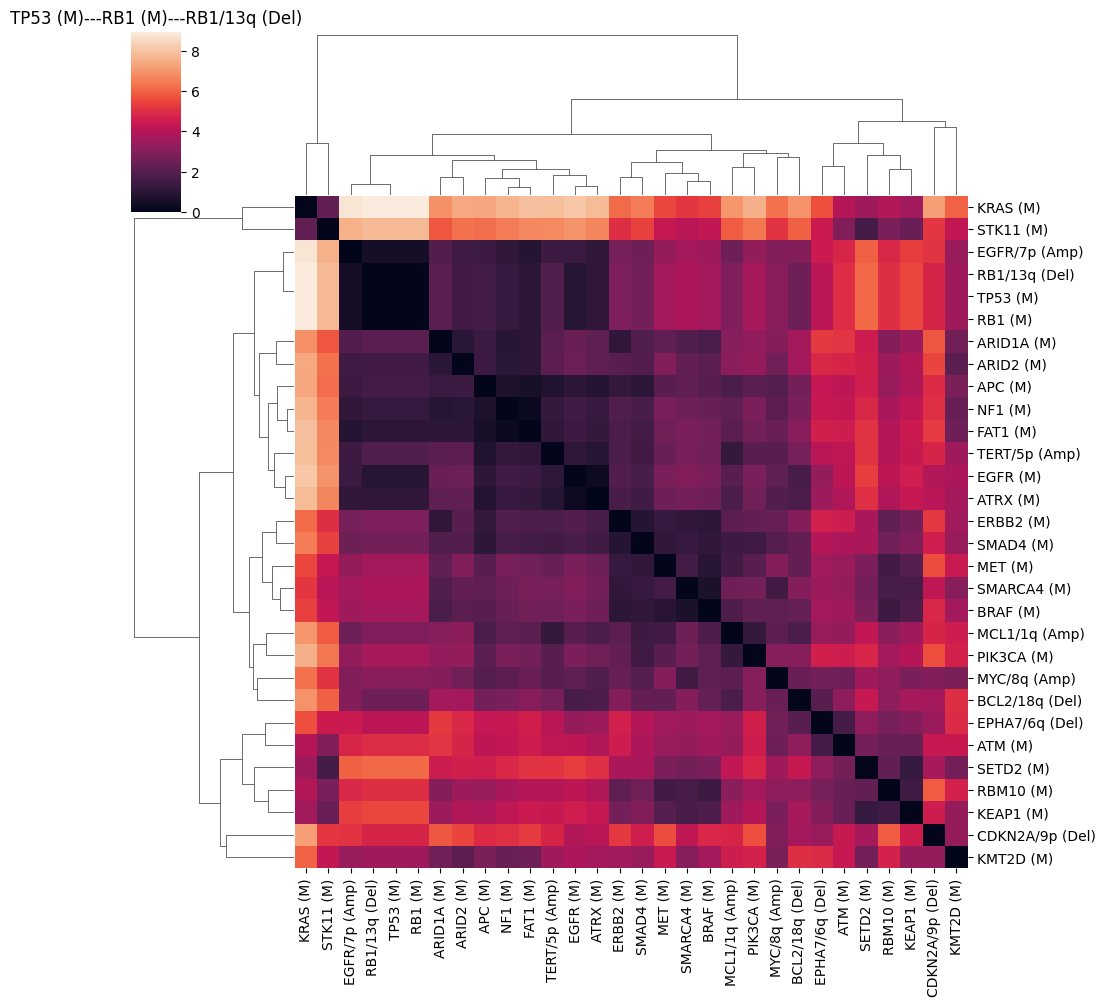

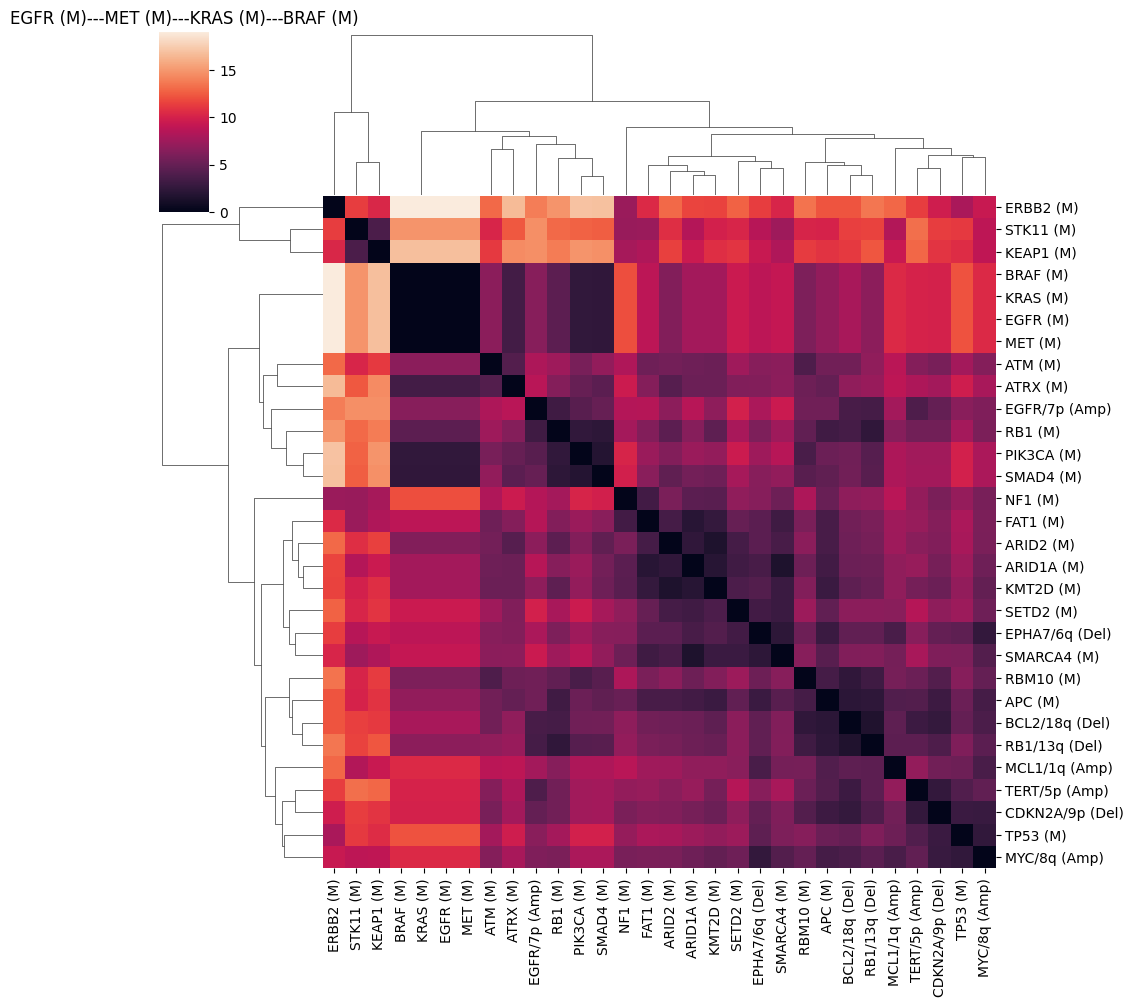

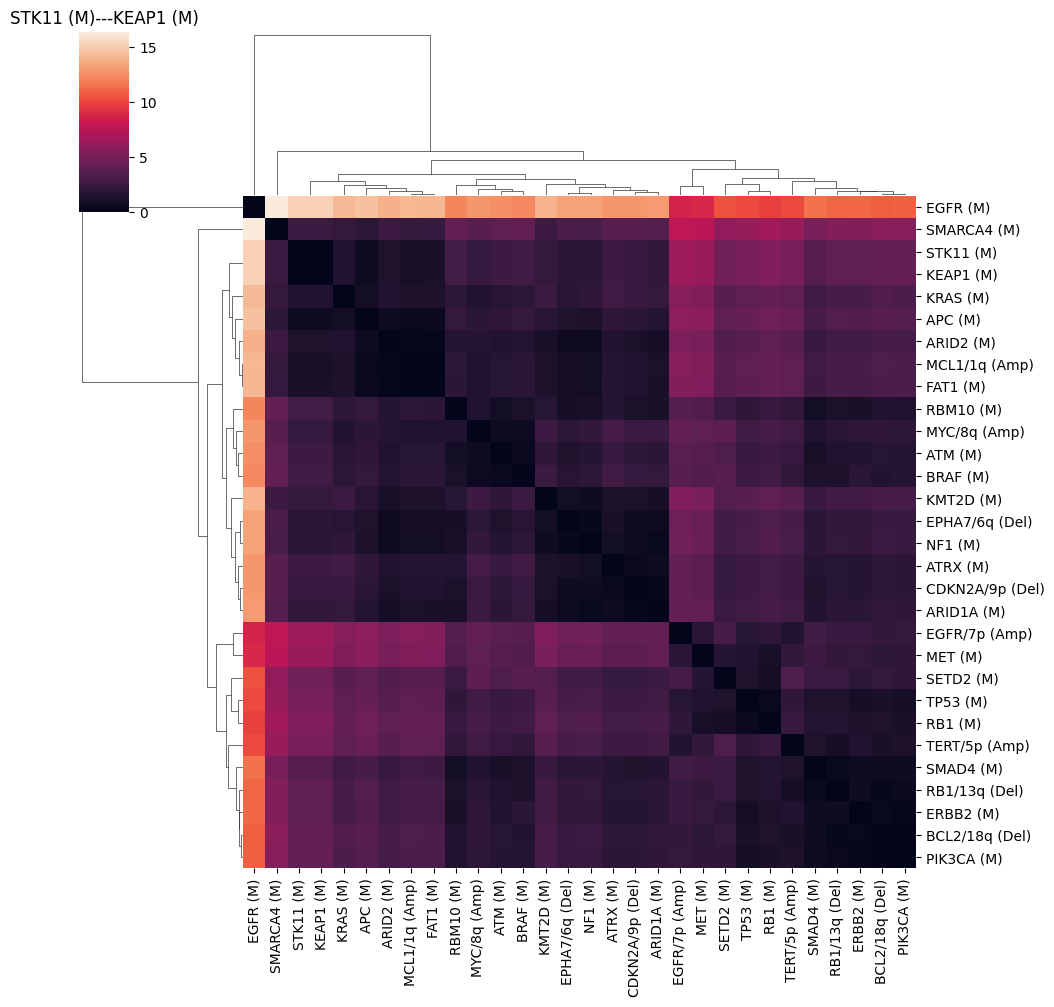

In [14]:
test_event_sets=[
    ['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)'],
    ['EGFR (M)', 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 
    ['STK11 (M)', 'KEAP1 (M)'] ,
    #[ 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 


    #['STK11 (M)', 'KEAP1 (M)','KRAS (M)'],
    #['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)','STK11 (M)', 'KEAP1 (M)'],
    #['ATRX (M)', 'SETD2 (M)', 'BCL2/18q (Del)','SMAD4 (M)', 'PIK3CA (M)'],
    #['ATRX (M)', 'SETD2 (M)', 'BCL2/18q (Del)','SMAD4 (M)'],
    #['ATRX (M)', 'SETD2 (M)','BCL2/18q (Del)'],

    #['SMAD4 (M)', 'PIK3CA (M)','EGFR (M)'],
    #['SMAD4 (M)', 'PIK3CA (M)','MET (M)'],

    #['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)','ATRX (M)']

    ]
dist_measurers=[]


for test_event_set in test_event_sets:
    dist_measurers.append(edm.getDistMeasurer(data_input, test_event_set=test_event_set, extended_event_domain=True, identifier='no_init_theta'))

for test_event_set, dist_m in zip(test_event_sets,dist_measurers):
    sns.clustermap(dist_m._dist_mat)
    plt.title('---'.join(test_event_set),loc='center')

4
5
3


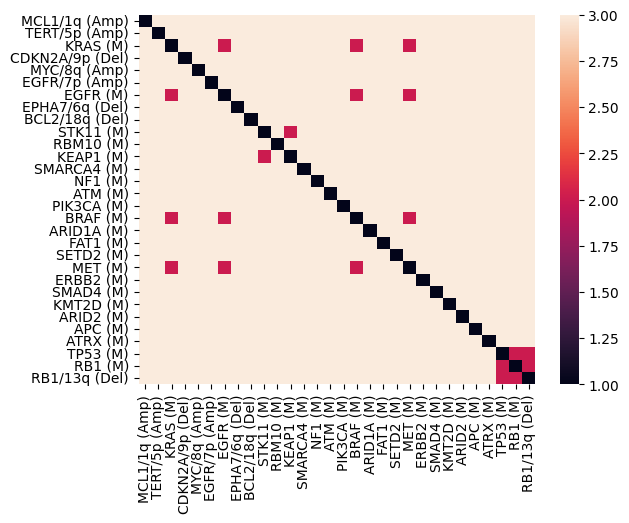

C:\Users\michi\AppData\Local\Temp\ipykernel_19856\3957560465.py:41: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  mean_linkage=scipy.cluster.hierarchy.linkage(sum_dist/(count_dist), method='average')


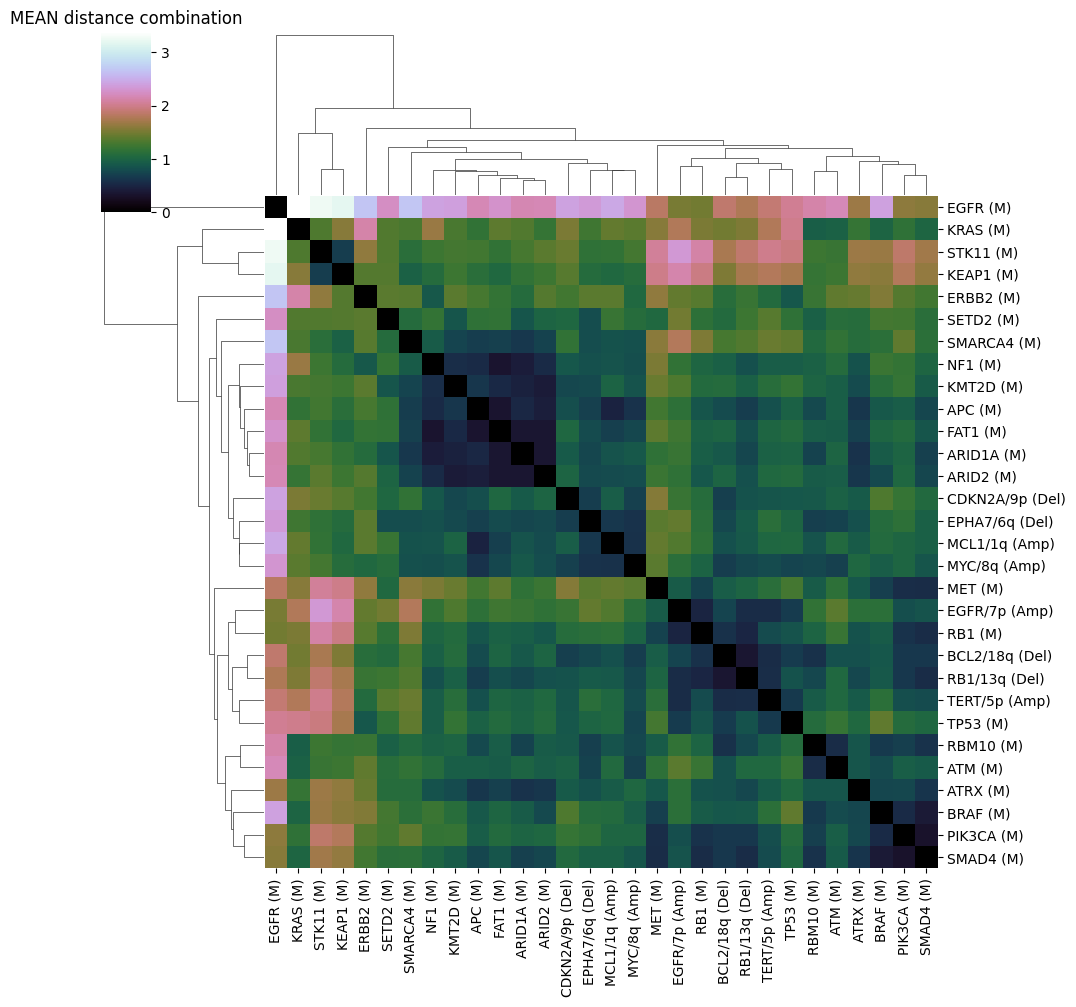

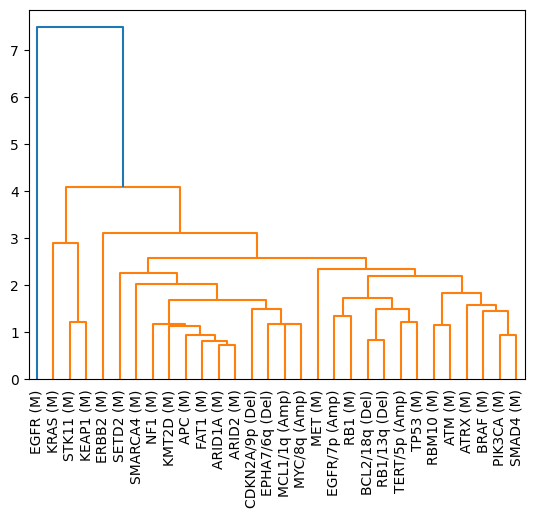

['EGFR (M)', 'KRAS (M)', 'STK11 (M)', 'KEAP1 (M)', 'ERBB2 (M)', 'SETD2 (M)', 'SMARCA4 (M)', 'NF1 (M)', 'KMT2D (M)', 'APC (M)', 'FAT1 (M)', 'ARID1A (M)', 'ARID2 (M)', 'CDKN2A/9p (Del)', 'EPHA7/6q (Del)', 'MCL1/1q (Amp)', 'MYC/8q (Amp)', 'MET (M)', 'EGFR/7p (Amp)', 'RB1 (M)', 'BCL2/18q (Del)', 'RB1/13q (Del)', 'TERT/5p (Amp)', 'TP53 (M)', 'RBM10 (M)', 'ATM (M)', 'ATRX (M)', 'BRAF (M)', 'PIK3CA (M)', 'SMAD4 (M)']


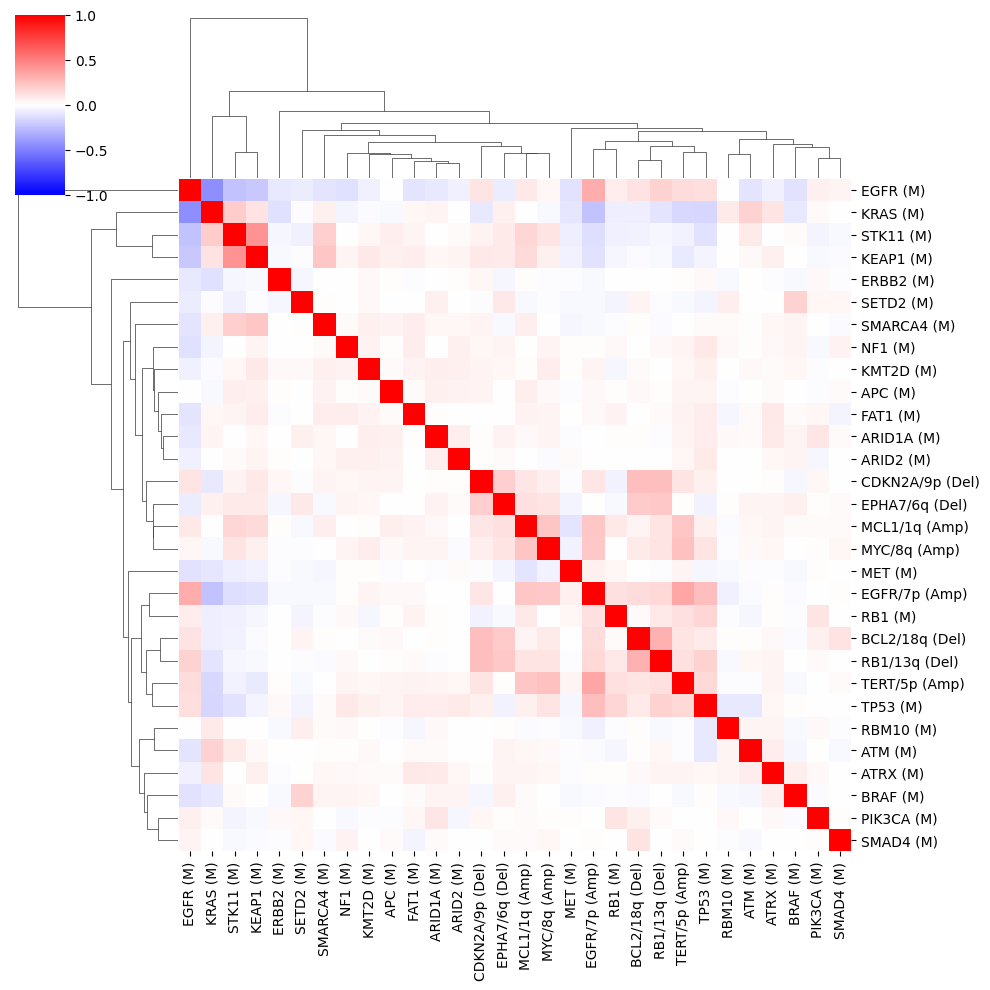

In [15]:
import scipy.cluster


max_dist=dist_measurers[0]._dist_mat*0
sum_dist=max_dist.copy()
count_dist=sum_dist.copy()

for test_event_set,dist_m in zip(test_event_sets,dist_measurers):

    dist_mat=dist_m._dist_mat.copy()

    dist_mat.sort_index(axis=0, inplace=True)
    dist_mat.sort_index(axis=1, inplace=True)
    #norm_c=1
    #norm_c=(len(test_event_set)*(len(test_event_set)+1))/2
    norm_c=len(test_event_set)+1
    #norm_c=np.log(len(test_event_set)+1)
    print(norm_c)

    norm_dist=dist_mat*(1/norm_c)
    max_dist = np.maximum(max_dist ,norm_dist)

    #dist_mat.loc[test_event_set,:]=0
    #dist_mat.loc[:, test_event_set]=0
    sum_dist+=norm_dist
    dist_mat.mask(dist_mat!=0, 1, inplace=True)
    count_dist += dist_mat
    #sns.heatmap(count_dist)
    #plt.show()
    
np.fill_diagonal(count_dist.values, 1)


#sns.clustermap(max_dist)
#plt.title("MAX distance combination")
#plt.show()

sns.heatmap(count_dist, xticklabels=True, yticklabels=True)
plt.show()

mean_linkage=scipy.cluster.hierarchy.linkage(sum_dist/(count_dist), method='average')
events_abc=list(count_dist.index)


sns.clustermap(sum_dist/(count_dist), row_linkage=mean_linkage, col_linkage=mean_linkage,cmap='cubehelix')
plt.title("MEAN distance combination")
plt.show()

scipy.cluster.hierarchy.dendrogram(mean_linkage, labels=events_abc, leaf_rotation=90)
plt.show()
ordered_list=[events_abc[i] for i in scipy.cluster.hierarchy.leaves_list(mean_linkage)]
print(ordered_list)

cov_mat=data_input[events_abc].corr()
sns.clustermap(cov_mat,  cmap='bwr', vmax=1, vmin=-1, row_linkage=mean_linkage, col_linkage=mean_linkage )
plt.show()


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


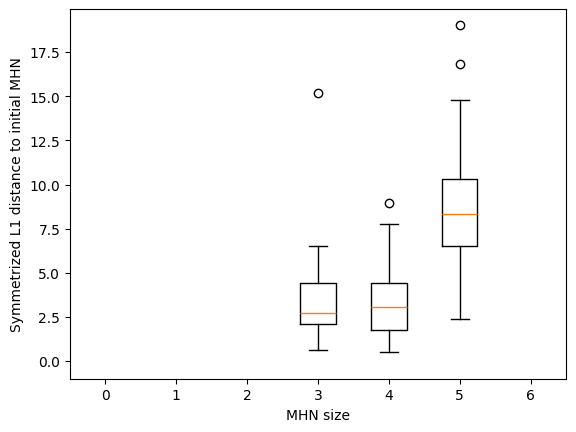

In [16]:
#plot average norm for different sizes of MHN
import cmhn_distances
mhn_norms={ }
mhn_norm_points=[]
mhn_norm_avgs=[]
for i in range(7): mhn_norms[i]=[]
for tes, dist_m in zip(test_event_sets, dist_measurers):
    n_tes=len(tes)+1
    #avg_mhn=np.average([m.log_theta for m in dist_m._mhns.values()])
    #avg_mhn=(avg_mhn+np.transpose(avg_mhn))/2
    for ev in events:

        
        #ev_mhn=dist_m._mhns[ev].log_theta.copy()
        #ev_mhn=(ev_mhn+np.transpose(ev_mhn))/2

        #np.fill_diagonal(ev_mhn,0)
        ev_mhn_norm=cmhn_distances.offdiag_l1_sym(dist_m._mhns[ev], dist_m._init_mhn)
        #ev_mhn-=dist_m._init_mhn.log_theta

        #ev_mhn-=(avg_mhn)
        #ev_mhn_norm=np.sum(np.abs(ev_mhn))
        if not ev in tes:
            mhn_norms[n_tes].append(ev_mhn_norm)
            mhn_norm_points.append((n_tes, ev_mhn_norm))
            

for n_tes in mhn_norms:
    mhn_norm_avgs.append((n_tes, np.average(mhn_norms[n_tes])))

#plt.scatter(*zip(*mhn_norm_points))    
#plt.scatter(*zip(*mhn_norm_avgs), marker='x', s=200, c='r', linewidths=10) 
#plt.show()

plt.boxplot(mhn_norms.values(), orientation='vertical')
plt.xticks(range(1, len(mhn_norms.keys()) + 1), mhn_norms.keys())
plt.xlabel('MHN size')
plt.ylabel("Symmetrized L1 distance to initial MHN")
plt.ylim(bottom=-1)
plt.show()



In [22]:
#print(dist_measurer._init_theta)

#dist_measurer._mhns['RB1 (M)'].plot()
#dist_measurer._mhns['ERBB2 (M)'].plot()


#dist_measurer._mhns['STK11 (M)'].plot(colorbar=False)
#dist_measurer._mhns['KEAP1 (M)'].plot(colorbar=False)

#dist_measurer._mhns['ARID1A (M)'].plot()
#dist_measurer._mhns['FAT1 (M)'].plot()
#dist_measurers[3]._mhns['RB1 (M)'].plot()
#dist_measurers[3]._mhns['RB1/13q (Del)'].plot()



Compare the above results to the more simple approach of plotting the covariance of each pair of events

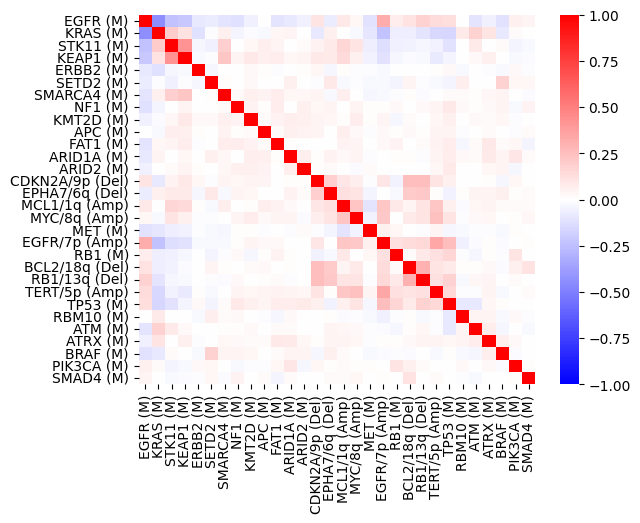

In [18]:
cov_mat=data_input[ordered_list].corr()
sns.heatmap(cov_mat, xticklabels=True, yticklabels=True, cmap='bwr', vmax=1, vmin=-1 )
plt.show()
#cov_dist_mat=1/(cov_mat*cov_mat+0.00001)
cov_dist_mat=1-(np.sqrt(cov_mat.abs()))

#sns.clustermap(cov_dist_mat )

# 
# np.cov(m=data_input, rowvar=False)

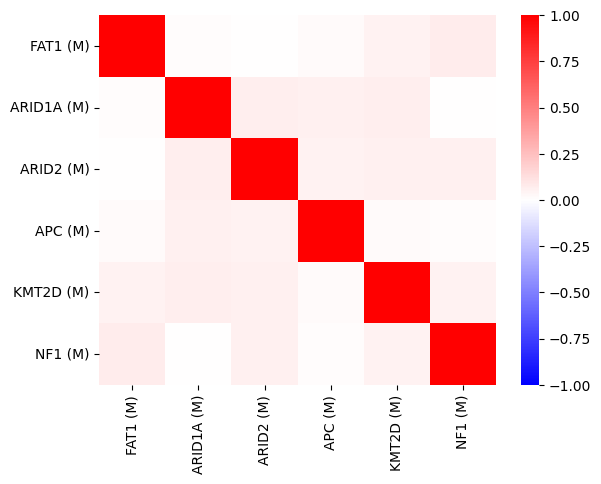

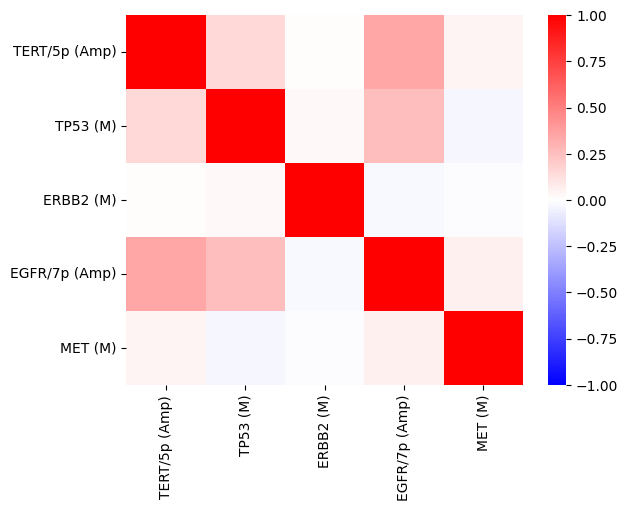

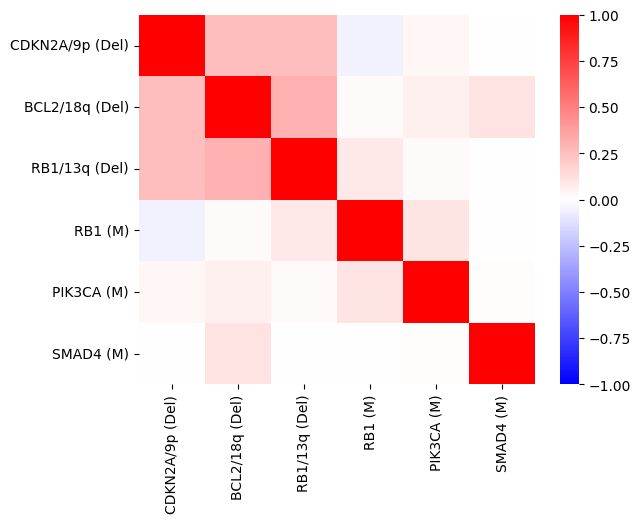

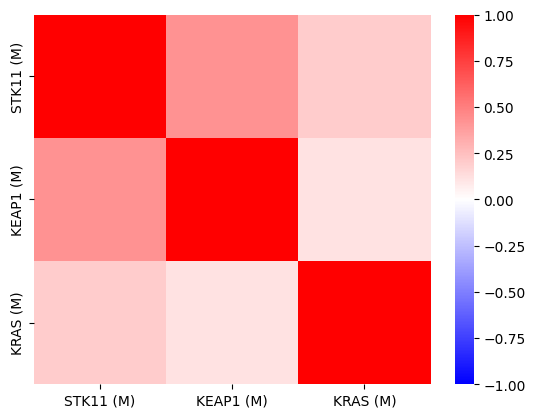

In [19]:
sub_ev_clusters=[
    ['FAT1 (M)','ARID1A (M)','ARID2 (M)','APC (M)','KMT2D (M)', 'NF1 (M)'],
    ['TERT/5p (Amp)','TP53 (M)','ERBB2 (M)', 'EGFR/7p (Amp)', 'MET (M)'],
    ['CDKN2A/9p (Del)', 'BCL2/18q (Del)','RB1/13q (Del)', 'RB1 (M)','PIK3CA (M)','SMAD4 (M)'],
    ['STK11 (M)','KEAP1 (M)', 'KRAS (M)']]
sub_cov_mats=[]
for sec in sub_ev_clusters:
    sub_cov_mats.append(data_input[sec].corr())

for scm in sub_cov_mats:
    sns.heatmap(scm, xticklabels=True, yticklabels=True, cmap='bwr', vmax=1, vmin=-1 )
    plt.show()




0.00038684719535783365


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\model.py:570: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(


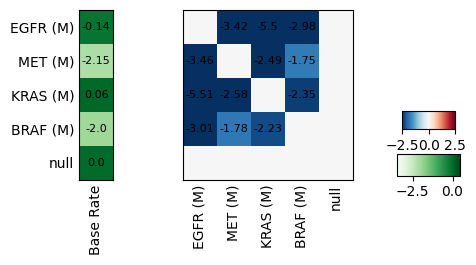

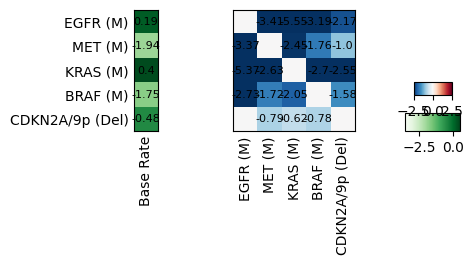

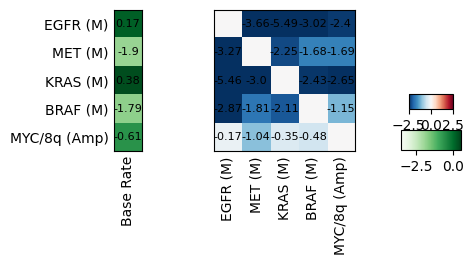

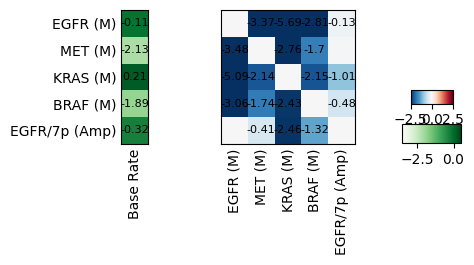

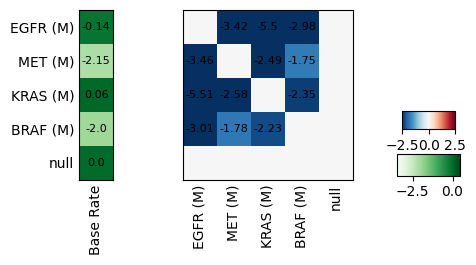

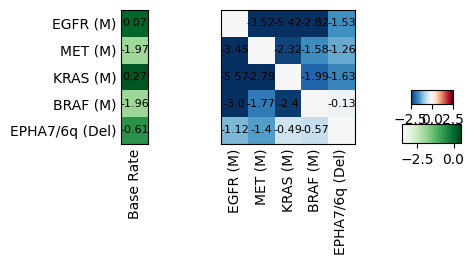

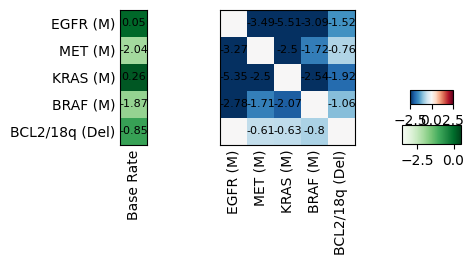

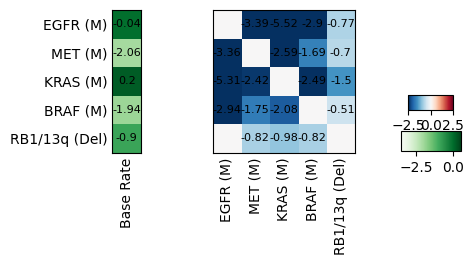

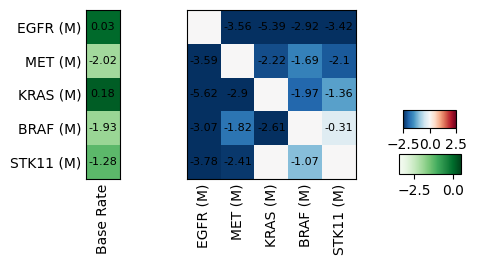

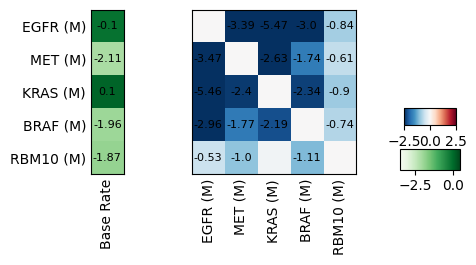

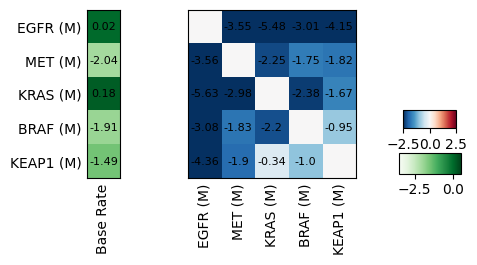

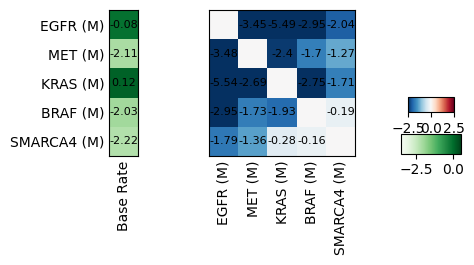

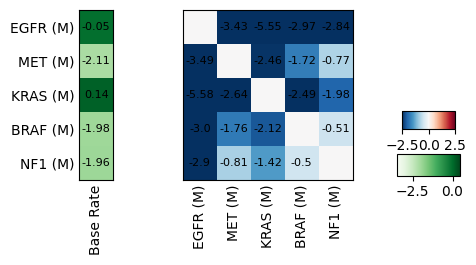

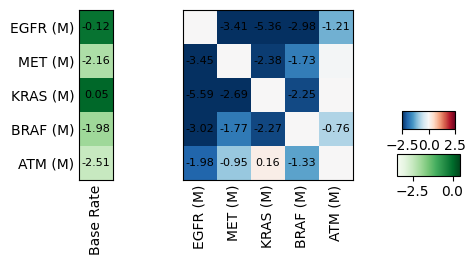

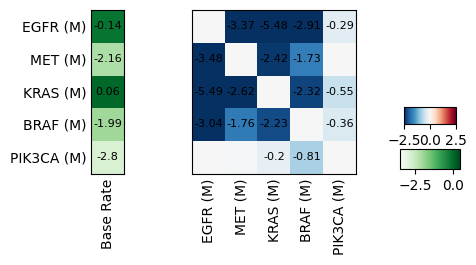

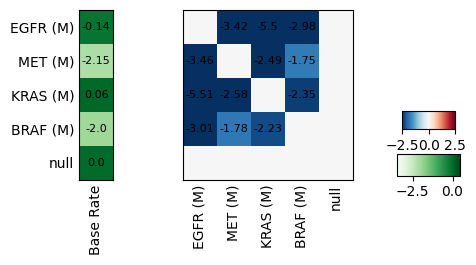

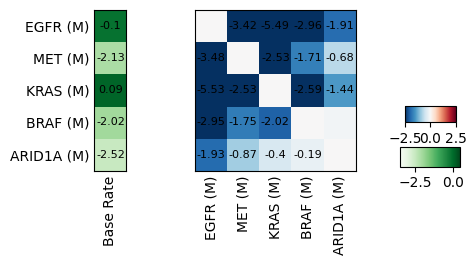

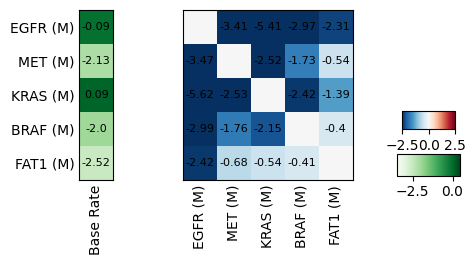

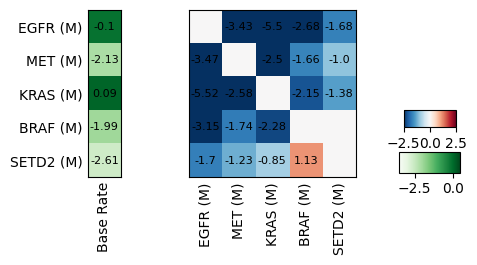

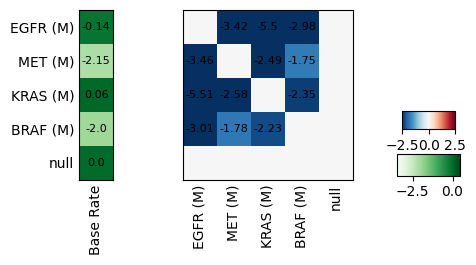

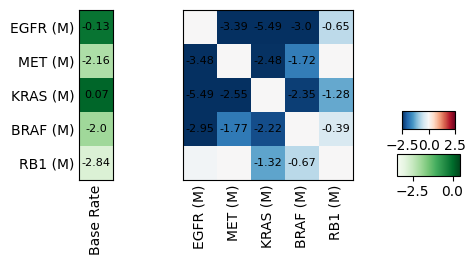

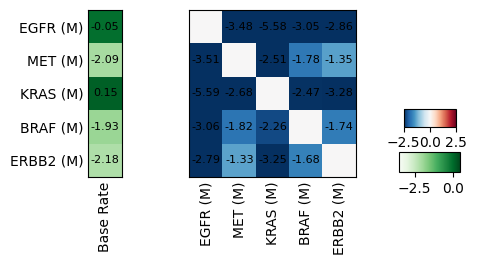

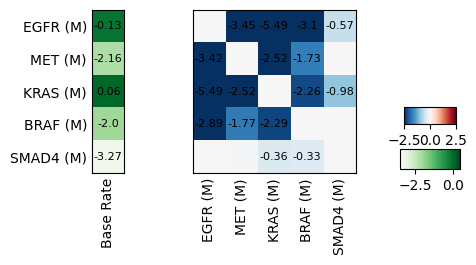

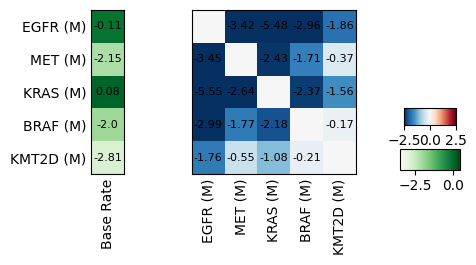

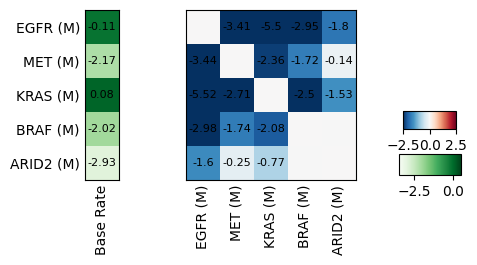

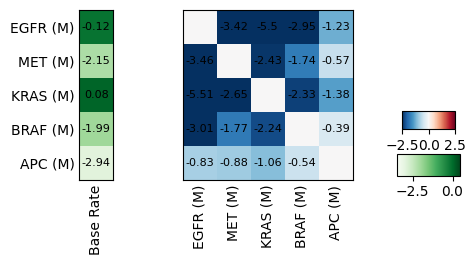

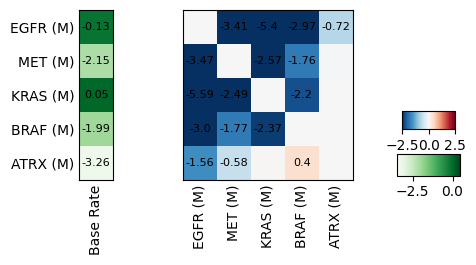

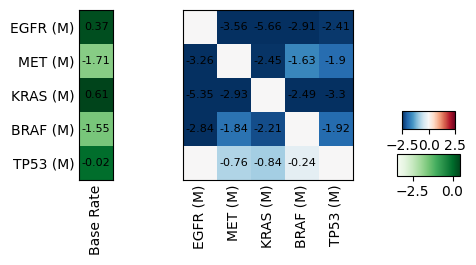

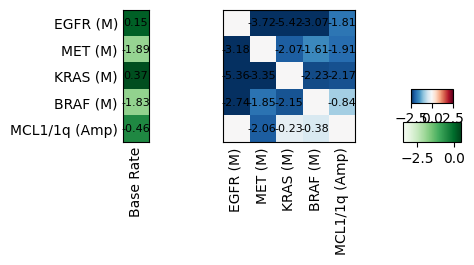

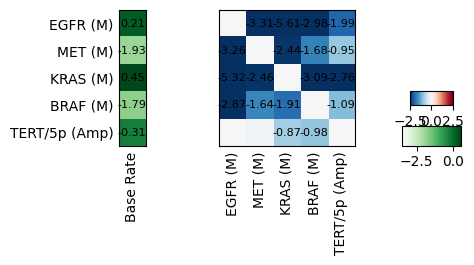

In [21]:
#print(dist_measurer._lam_test)
print(1/len(data_input))

for ev in dist_measurer._events:
    dist_measurers[1]._mhns[ev].plot()